# Machine Learning 2

1. Import packages

In [16]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

2. Load csv

In [17]:
df = pd.read_csv("data_clean.csv")
df.drop(columns="Unnamed: 0", axis=1, inplace=True)
df.drop(columns="Description", axis=1, inplace=True)
df.drop(columns="Genre", axis=1, inplace=True)
df.drop(columns="GameName", axis=1, inplace=True)
df

,MetaScore,UserScore,ReleaseYear,Multiplayer,Rating,Developer,Action,Adventure,Arcade,Fantasy,...,Horror,Open-World,Puzzle,Racing,Role-Playing,Sci-Fi,Shooter,Sports,Strategy,Survival
0,97,82,2021,False,M,ZA/UM,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,96,92,2004,False,M,Valve Software,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,96,78,2015,True,M,Rockstar North,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,96,26,2006,True,E,Sports Interactive,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,96,91,2007,True,M,Valve Software,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,66,70,2014,False,E,Freebird Games,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4166,66,69,2017,True,M,Games Farm,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4167,66,38,2010,True,T,Ubisoft,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4168,66,71,2012,False,E,bom667,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


3. Change columns to numeric

In [18]:
def str_to_numeric(dataset,cols):
    for col in cols:
        le = preprocessing.LabelEncoder()
        dataset[col] = le.fit_transform(dataset[col])
    return dataset  

In [19]:
cols = ['Multiplayer','Developer','Rating']
df_new = str_to_numeric(df,cols)
df_new

,MetaScore,UserScore,ReleaseYear,Multiplayer,Rating,Developer,Action,Adventure,Arcade,Fantasy,...,Horror,Open-World,Puzzle,Racing,Role-Playing,Sci-Fi,Shooter,Sports,Strategy,Survival
0,97,82,2021,0,3,1889,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,96,92,2004,0,3,1800,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,96,78,2015,1,3,1371,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,96,26,2006,1,0,1528,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,96,91,2007,1,3,1800,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,66,70,2014,0,0,613,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4166,66,69,2017,1,3,654,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4167,66,38,2010,1,5,1762,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4168,66,71,2012,0,0,1913,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
target_col = 'UserScore'
X = df_new.drop(columns=target_col)
y = df_new.loc[:,target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MetaScore     4170 non-null   int64
 1   UserScore     4170 non-null   int64
 2   ReleaseYear   4170 non-null   int64
 3   Multiplayer   4170 non-null   int64
 4   Rating        4170 non-null   int32
 5   Developer     4170 non-null   int32
 6   Action        4170 non-null   int64
 7   Adventure     4170 non-null   int64
 8   Arcade        4170 non-null   int64
 9   Fantasy       4170 non-null   int64
 10  Fighting      4170 non-null   int64
 11  Horror        4170 non-null   int64
 12  Open-World    4170 non-null   int64
 13  Puzzle        4170 non-null   int64
 14  Racing        4170 non-null   int64
 15  Role-Playing  4170 non-null   int64
 16  Sci-Fi        4170 non-null   int64
 17  Shooter       4170 non-null   int64
 18  Sports        4170 non-null   int64
 19  Strategy      4170 non-null

4. Models

## Linear Regression

In [27]:
model_lr = linear_model.LinearRegression().fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
print(f"R2 score: {r2_lr}")

R2 score: 0.22126975520451686


## Random Forest Regressor

In [29]:
model_rf = RandomForestRegressor(n_estimators = 1000).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
print(f"R2 score: {r2_rf}")

R2 score: 0.2689385603190889


## Gradient Boosting Regressor

In [30]:
model_gb = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
pred_gb = model_gb.predict(X_test)
r2_gb = r2_score(y_test, pred_gb)
print(f"R2 score: {r2_gb}")

R2 score: 0.2581339186801638


5. Compare between the three models

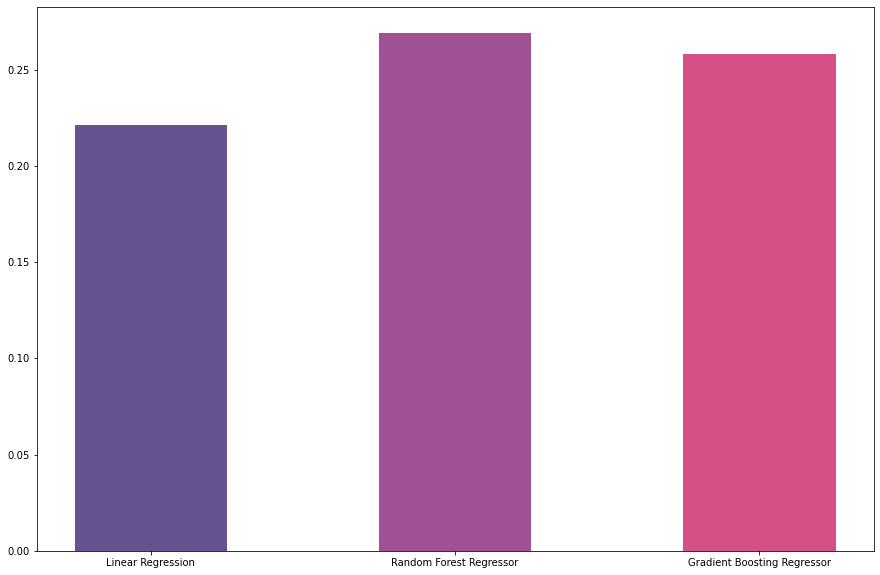

In [25]:
reg_r2 =[r2_lr,r2_rf,r2_gb]
reg_name =["Linear Regression","Random Forest Regressor","Gradient Boosting Regressor"]
colors = ['#665191','#a05195','#d45087']


plt.figure(figsize=(15, 10))
plt.bar(reg_name,reg_r2, color=colors,width = 0.5)
plt.show()